In [81]:
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import preprocessing
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
#import plotly.graph_objects as go
%matplotlib inline
data_dir = Path("datasets")

In [82]:
# Churn: predict churn
file_path = data_dir / 'churn' / 'churn.csv'
churn = pd.read_csv(file_path)

# Data Cleaning

In [83]:

churn = churn.drop(columns=['customerID'])

In [84]:
numeric_churn = churn

In [85]:
numeric_churn['TotalCharges'] = pd.to_numeric(numeric_churn.TotalCharges, errors='coerce')

In [86]:
numeric_churn = pd.get_dummies(numeric_churn)

In [87]:
numeric_churn = numeric_churn.drop(columns = ['Churn_No'])

In [88]:
numeric_churn = numeric_churn[numeric_churn.tenure != 0 ]

In [89]:
numeric_churn_corr = numeric_churn.corr()

# Finding interesting relationships

In [90]:
def label_disterbition():
    names = ['Yes','No']
    values = [churn.Churn[churn.Churn == 'Yes'].count(),churn.Churn[churn.Churn == 'No'].count()]
    fig, axs = plt.subplots(1, 1, figsize=(5,5), sharey=True)
    axs.bar(names, values)
    fig.suptitle('Label Disturbition')

In [91]:
def corr_churn():
    numeric_churn_corr = numeric_churn.corr()
    highest_corr = numeric_churn_corr[numeric_churn_corr.Churn_Yes > 0.25 ]
    lowest_corr = numeric_churn_corr[numeric_churn_corr.Churn_Yes < -0.25 ]
    highlight_chrun_corr = pd.concat([highest_corr, lowest_corr]  )
    highlight_chrun_corr['Churn_Yes'].drop('Churn_Yes').plot(kind='barh',
                                                            title='Significant Corrlations with Churn',
                                                                             )
    

In [92]:
def contract_type_compare():
    churn_count = (churn.Churn[(churn.Churn == 'Yes')].count())
    a = (churn.Churn[(churn.Contract == 'Month-to-month') & (churn.Churn == 'Yes')].count())/(churn_count)
    b = (churn.Churn[(churn.Contract == 'One year') & (churn.Churn == 'Yes')].count())/(churn_count)
    c = (churn.Churn[(churn.Contract == 'Two year') & (churn.Churn == 'Yes')].count())/(churn_count)
    names = ['Month-to-month','One year','Two year']
    values = [a,b ,c]
    fig, axs = plt.subplots(1, 1, figsize=(5,5), sharey=True )
    axs.bar(names, values)
    fig.suptitle('Churn by Contract Type')

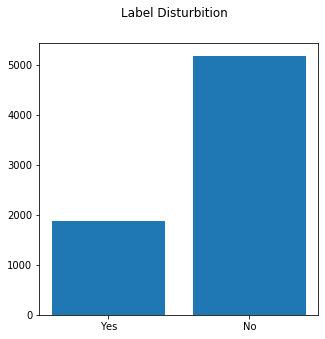

In [93]:
label_disterbition()

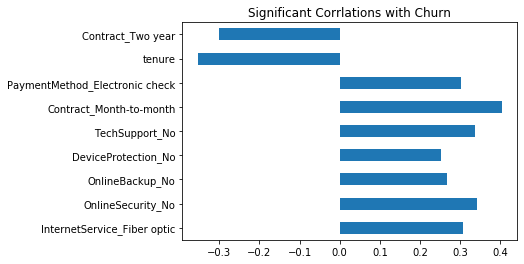

In [94]:
corr_churn()

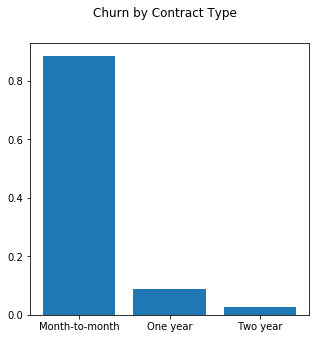

In [95]:
contract_type_compare()

# Data Splitting 

In [96]:
from sklearn.model_selection import train_test_split
test_size = 1700
train, test = train_test_split(numeric_churn, test_size=test_size, random_state=0, shuffle=True)
label = 'Churn_Yes'
x_train, y_train = train.drop(label, axis=1), train[label]
x_test, y_test = test.drop(label, axis=1), test[label]
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

(5332, 45) (5332,) (1700, 45) (1700,)


# Classification Benchmark

In [97]:
def Benchmark_algorithm():
    print ("Majority class benchmark rate :", (1-(y_train.sum()/y_train.count())))

In [98]:
Benchmark_algorithm()

Majority class benchmark rate : 0.7304951237809452


# KNN

In [99]:
def KNN():
    numlist = [4,6,8]
    for i in numlist:
        clf = KNeighborsClassifier(n_neighbors=(i))
        clf.fit(x_train, y_train)
        y_train_pred = clf.predict(x_train)
        y_test_pred = clf.predict(x_test)
        train_acc = accuracy_score(y_train, y_train_pred)
        test_acc = accuracy_score(y_test, y_test_pred)
        print("KNN with", i, "Neighbors")
        print("Accuracy rate of training set: ", train_acc)
        print("Accuracy rate of testing set: ", test_acc)
        print("*"*70)

In [100]:
KNN()

KNN with 4 Neighbors
Accuracy rate of training set:  0.8372093023255814
Accuracy rate of testing set:  0.7717647058823529
**********************************************************************
KNN with 6 Neighbors
Accuracy rate of training set:  0.8225806451612904
Accuracy rate of testing set:  0.7811764705882352
**********************************************************************
KNN with 8 Neighbors
Accuracy rate of training set:  0.8147036759189797
Accuracy rate of testing set:  0.7835294117647059
**********************************************************************


# KNN Scaled

In [101]:
def KNN_scaled():
    numlist = [4,6,8]
    for i in numlist:
        from sklearn.preprocessing import StandardScaler
        scaler = StandardScaler()
        x_train_scaled = scaler.fit_transform(x_train)
        x_test_scaled = scaler.transform(x_test)
        clf = KNeighborsClassifier(n_neighbors=(i))
        clf.fit(x_train_scaled, y_train)
        y_train_pred = clf.predict(x_train_scaled)
        y_test_pred = clf.predict(x_test_scaled)
        train_acc = accuracy_score(y_train, y_train_pred)
        test_acc = accuracy_score(y_test, y_test_pred)
        print("KNN with", i, "Neighbors")
        print("Accuracy rate of training set: ", train_acc)
        print("Accuracy rate of testing set: ", test_acc)
        print("*"*70)

In [102]:
KNN_scaled()

KNN with 4 Neighbors
Accuracy rate of training set:  0.8372093023255814
Accuracy rate of testing set:  0.7711764705882352
**********************************************************************
KNN with 6 Neighbors
Accuracy rate of training set:  0.8238934733683421
Accuracy rate of testing set:  0.77
**********************************************************************
KNN with 8 Neighbors
Accuracy rate of training set:  0.8171417854463616
Accuracy rate of testing set:  0.7758823529411765
**********************************************************************


# Desicion Tree

In [110]:
def desicion_tree():
    x = numeric_churn.drop('Churn_Yes', axis=1)
    y = numeric_churn.Churn_Yes
    numlist = [4,20,42]
    for i in numlist:
        train_acc = []
        test_acc = []
        tree = DecisionTreeClassifier(random_state=0, max_depth=i)
        tree.fit(x, y)
        tree.fit(x_train, y_train)
        train_acc.append(tree.score(x_train, y_train))
        test_acc.append(tree.score(x_test, y_test))
        print("Desicion treee with max depth of", i)
        print("Accuracy rate of training set: ", train_acc)
        print("Accuracy rate of testing set: ", test_acc)
        print(precision_score(x_test,y_test))
        print("*"*70)

In [111]:
desicion_tree()

Desicion treee with max depth of 4
Accuracy rate of training set:  [0.7948237059264817]
Accuracy rate of testing set:  [0.7970588235294118]


NameError: name 'precision_score' is not defined

# Random Forest

In [105]:
def random_forrest():
    test_acc_list = []
    test_depth = []
    numlist = [1,3,7,12,14,17,20,21,25,30,31,32,37] #there are more than 3 values for q8
    for i in numlist:
        clf = RandomForestClassifier(n_estimators=100, max_depth=i)
        clf.fit(x_train, y_train)
        y_train_pred = clf.predict(x_train)
        y_test_pred = clf.predict(x_test)
        train_acc = accuracy_score(y_train, y_train_pred)
        test_acc = accuracy_score(y_test, y_test_pred)
        test_acc_list.append(round(test_acc,4))
        test_depth.append(i)
        print("Random forrest with max depth of", i,"and 100 estimators")
        print("Accuracy rate of training set: ", train_acc)
        print("Accuracy rate of testing set: ", test_acc)
        print("*"*70)
    fig = go.Figure(data=[go.Table(header=dict(values=['Success rate of testing set', 'Max depth']),
                                  cells=dict(values=[test_acc_list, test_depth]),
                                  )
                     ])
    fig.update_layout(width=600, height=600)
    fig.show()
    feature_importances = clf.feature_importances_
    features = x_train.columns
    stats = pd.DataFrame({'feature':features, 'importance':feature_importances})
    print(stats.head(10))
    top_10 = stats.sort_values('importance', ascending=False).head(10)
    top_10.plot(y='importance', x='feature', kind='barh')
    plt.title('Feature Importance of Random Forest');

In [106]:
 random_forrest()


Random forrest with max depth of 1 and 100 estimators
Accuracy rate of training set:  0.7304951237809453
Accuracy rate of testing set:  0.7458823529411764
**********************************************************************
Random forrest with max depth of 3 and 100 estimators
Accuracy rate of training set:  0.786946736684171
Accuracy rate of testing set:  0.7864705882352941
**********************************************************************
Random forrest with max depth of 7 and 100 estimators
Accuracy rate of training set:  0.8212678169542386
Accuracy rate of testing set:  0.8058823529411765
**********************************************************************
Random forrest with max depth of 12 and 100 estimators
Accuracy rate of training set:  0.9426106526631658
Accuracy rate of testing set:  0.7970588235294118
**********************************************************************
Random forrest with max depth of 14 and 100 estimators
Accuracy rate of training set:  0.9795573

NameError: name 'go' is not defined

# AdaBoost

In [ ]:
def adaboost():
    numlist = [7,15,35]
    for i in numlist:
        base_estimator = DecisionTreeClassifier(max_depth=i)
        classifier = AdaBoostClassifier(random_state=0, n_estimators=100, base_estimator=base_estimator)
        classifier.fit(x_train, y_train)
        print(f'AdaBoost: Train accuracy = {classifier.score(x_train, y_train)}, Test accuracy = {classifier.score(x_test, y_test)}')
        print("*"*100)
 

In [ ]:
adaboost()

# Q9

In [107]:
def random_forrest_v2(x_train,y_train,x_test,y_test):
    test_acc_list = []
    numlist = [7]
    for i in numlist:
        clf = RandomForestClassifier(n_estimators=100, max_depth=i)
        clf.fit(x_train, y_train)
        y_train_pred = clf.predict(x_train)
        y_test_pred = clf.predict(x_test)
        train_acc = accuracy_score(y_train, y_train_pred)
        test_acc = accuracy_score(y_test, y_test_pred)
        print("Random forrest with max depth of", i,"and 100 estimators")
        print("Accuracy rate of training set: ", train_acc)
        print("Accuracy rate of testing set: ", test_acc)
    return test_acc

In [108]:
def q9():
    test_acc = []
    precent_list = [0.1,0.3,0.5,0.7,0.99]
    for i in precent_list:
        test_size = int((len(churn)-(len(churn)*i)))
        print("The size of the training set is ", i*100,"% of the sampels")
        train, test = train_test_split(numeric_churn, test_size=test_size, random_state=0, shuffle=True)
        label = 'Churn_Yes'
        x_train, y_train = train.drop(label, axis=1), train[label]
        x_test, y_test = test.drop(label, axis=1), test[label]
        test_acc.append(random_forrest_v2(x_train,y_train,x_test,y_test))
        print("*"*70)
    plt.plot(precent_list,test_acc)
    plt.title('Random forest accuracy rate by size of training set')
    plt.ylabel('Accuracy rate')
    plt.xlabel('Size of training set from total sampels ')
    plt.show()

The size of the training set is  10.0 % of the sampels
Random forrest with max depth of 7 and 100 estimators
Accuracy rate of training set:  0.9121037463976945
Accuracy rate of testing set:  0.7978857683811929
**********************************************************************
The size of the training set is  30.0 % of the sampels
Random forrest with max depth of 7 and 100 estimators
Accuracy rate of training set:  0.845861084681256
Accuracy rate of testing set:  0.7922920892494929
**********************************************************************
The size of the training set is  50.0 % of the sampels
Random forrest with max depth of 7 and 100 estimators
Accuracy rate of training set:  0.8305326117915124
Accuracy rate of testing set:  0.801476853166714
**********************************************************************
The size of the training set is  70.0 % of the sampels
Random forrest with max depth of 7 and 100 estimators
Accuracy rate of training set:  0.8268292682926829

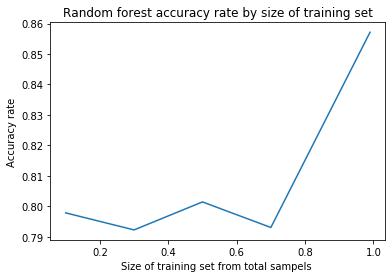

In [109]:
q9()